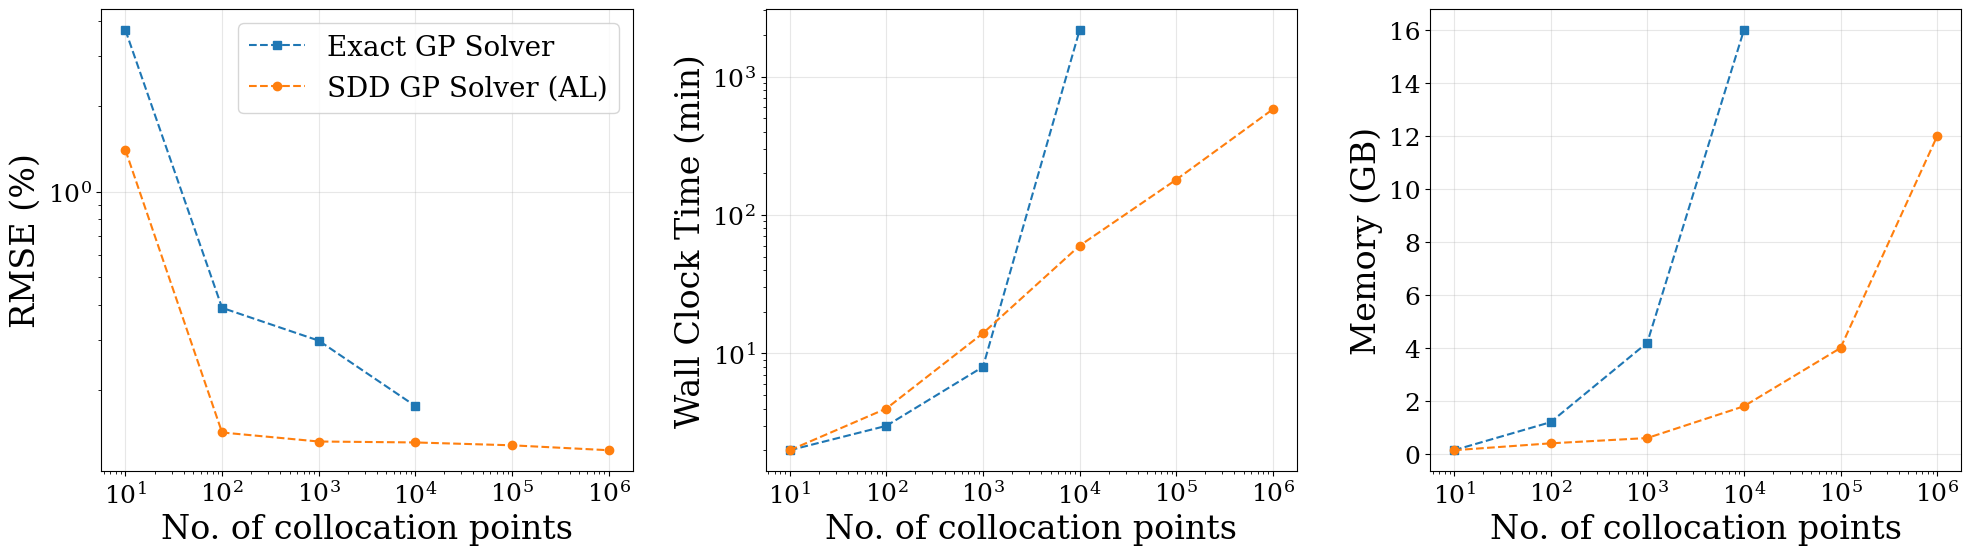

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Load Data from CSV ===
data = pd.read_csv("heat_time_data.csv")
sample_logs = data['sample_logs'].values
sample_sizes = data['sample_sizes'].values

exact_rmse = data['exact_rmse'].values
exact_time = data['exact_time'].values
exact_memory = data['exact_memory'].values

# SDD GP Solver (full data)
sdd_rmse = data['sdd_rmse'].values
sdd_time = data['sdd_time'].values
sdd_memory = data['sdd_memory'].values

# === Plot Settings ===
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 24
})

fig, axs = plt.subplots(1, 3, figsize=(24, 6))
plt.subplots_adjust(wspace=0.25)

# === Plot RMSE ===
axs[0].plot(sample_sizes[:4], exact_rmse[:4], 's--', label="Exact GP Solver")
axs[0].plot(sample_sizes, sdd_rmse, 'o--', label="SDD GP Solver (AL)")
axs[0].set_xlabel("No. of collocation points")
axs[0].set_ylabel("RMSE (%)")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].grid(True, alpha=0.3)
axs[0].legend(fontsize=20, loc='upper right')

# === Plot Time ===
axs[1].plot(sample_sizes[:4], exact_time[:4], 's--')
axs[1].plot(sample_sizes, sdd_time, 'o--')
axs[1].set_xlabel("No. of collocation points")
axs[1].set_ylabel("Wall Clock Time (min)")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].grid(True, alpha=0.3)

# === Plot Memory ===
axs[2].plot(sample_sizes[:4], exact_memory[:4], 's--')
axs[2].plot(sample_sizes, sdd_memory, 'o--')
axs[2].set_xlabel("No. of collocation points")
axs[2].set_ylabel("Memory (GB)")
axs[2].set_xscale('log')
axs[2].grid(True, alpha=0.3)

# === Save Plot ===
output_path = "heat1D_comparison_log.pdf"
plt.savefig(output_path, format="pdf", dpi=300,bbox_inches='tight')
plt.show()
